# Testing 12 Technical Indicators With Machine Learning Predictions

In [1]:
import pandas as pd
df = pd.read_csv("SPY.USUSD_Candlestick_15_M_BID_22.04.2019-16.04.2022.csv")
#Changing from old dataset, and applying lower case to make it fit with the old code
df.columns = [x.lower() for x in df.columns]

#Check if NA values are in data
#df=df[df['volume']!=0] # no price movmenets / eiter holiday or weekends, not relevant for our study
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,gmt time,open,high,low,close,volume
104731,16.04.2022 22:45:00.000,437.876,437.876,437.876,437.876,0.0
104732,16.04.2022 23:00:00.000,437.876,437.876,437.876,437.876,0.0
104733,16.04.2022 23:15:00.000,437.876,437.876,437.876,437.876,0.0
104734,16.04.2022 23:30:00.000,437.876,437.876,437.876,437.876,0.0
104735,16.04.2022 23:45:00.000,437.876,437.876,437.876,437.876,0.0


In [2]:
import pandas_ta as pa
help(pa.cci)


Help on function cci in module pandas_ta.momentum.cci:

cci(high, low, close, length=None, c=None, talib=None, offset=None, **kwargs)
    Commodity Channel Index (CCI)
    
    Commodity Channel Index is a momentum oscillator used to primarily identify
    overbought and oversold levels relative to a mean.
    
    Sources:
        https://www.tradingview.com/wiki/Commodity_Channel_Index_(CCI)
    
    Calculation:
        Default Inputs:
            length=14, c=0.015
        SMA = Simple Moving Average
        MAD = Mean Absolute Deviation
        tp = typical_price = hlc3 = (high + low + close) / 3
        mean_tp = SMA(tp, length)
        mad_tp = MAD(tp, length)
        CCI = (tp - mean_tp) / (c * mad_tp)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        c (float): Scaling Constant. Default: 0.015
        talib (bool): If TA Lib is

In [3]:
#Listing all available techincal tools for our study
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

We will be using the following indicators:


In [4]:
df["RSI"] = pa.rsi(df.close, length=16)
df["CCI"] = pa.cci(df.high, df.low, df.close, length=16)
df["AO"] = pa.ao(df.high, df.low)
df["MOM"] = pa.mom(df.close, length=16)
#store everything in a dataframe "a" and join to the orginial dataset
a = pa.macd(df.close)
df = df.join(a)
df["ATR"] = pa.atr(df.high, df.low, df.close, length=16)
df["BOP"] = pa.bop(df.open, df.high, df.low, df.close, length=16)
df["RVI"] = pa.rvi(df.close)
a = pa.dm(df.high, df.low, length=16)
df = df.join(a)
a = pa.stoch(df.high, df.low, df.close)
df = df.join(a)
a = pa.stochrsi(df.close, length=16)
df = df.join(a)
df["WPR"] = pa.willr(df.high, df.low, df.close, length=16)
#print(pa.macd(df.close))
#help(pa.mom)
#help(pa.cci)
# Get all candle patterns (This is the default behaviour)
#df1 = df.ta.cdl_pattern(name="all")
# Get only one pattern
#df = df.ta.cdl_pattern(name="doji")
# Get some patterns
#df = df.ta.cdl_pattern(name=["doji", "inside"])
#df

In [5]:
a = pa.macd(df.close)
a

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
104731,-4.012585e-07,1.888276e-07,-5.900862e-07
104732,-3.715357e-07,1.748404e-07,-5.463761e-07
104733,-3.440145e-07,1.618893e-07,-5.059038e-07
104734,-3.185319e-07,1.498975e-07,-4.684294e-07


In [6]:
#remove non valid number due to NaNs from the last output
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

gmt time               0
open                   0
high                   0
low                    0
close                  0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
dtype: int64

In [7]:
df.reset_index(drop=True, inplace=True)
df.tail()

,gmt time,open,high,low,close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
30829,14.04.2022 22:30:00.000,437.876,437.876,437.876,437.876,0.0,25.241356,-48.484848,-1.757779,-2.630,...,0.383751,1.0,33.416207,0.059659,0.127200,3.320321,2.875524,0.000000,0.000000,-97.256944
30830,14.04.2022 22:45:00.000,437.876,437.876,437.876,437.876,0.0,25.241356,-44.444444,-1.660559,-1.441,...,0.359766,1.0,33.416207,0.055930,0.119250,4.197352,3.475267,0.000000,0.000000,-96.391046
30831,14.04.2022 23:00:00.000,437.876,437.876,437.876,437.876,0.0,25.241356,-41.025641,-1.557912,-1.300,...,0.337281,1.0,33.416207,0.052434,0.111797,4.861980,4.126551,0.000000,0.000000,-96.391046
30832,14.04.2022 23:15:00.000,437.876,437.876,437.876,437.876,0.0,25.241356,-38.095238,-1.453206,-1.370,...,0.316201,1.0,33.416207,0.049157,0.104810,3.658996,4.239443,0.000000,0.000000,-94.625850
30833,14.04.2022 23:30:00.000,437.876,437.876,437.876,437.876,0.0,25.241356,-35.555556,-1.344500,-1.251,...,0.296438,1.0,33.416207,0.046085,0.098259,1.867612,3.462863,10.884354,3.628118,-94.397163


In [8]:
#Target flexible way
pipdiff = 250*1e-4 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

Paramteres to tweak to optimize accuracy of prediction for each side of the market.

standard values:
pipdiff = 200*1e-4 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

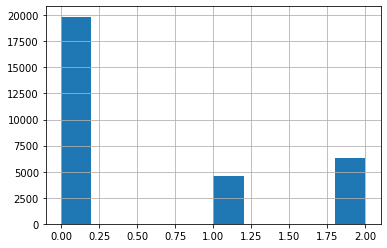

In [9]:
df['Target'] = mytarget(96, df) # 1 day into the future 
df['Target'].hist()
#df.tail(20)
#df['Target'] = df['Target'].astype(int)

#Category 0  = sideways market , category 1: downtrend, category 2: uptrend 

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,gmt time,open,high,low,close,volume,RSI,CCI,AO,MOM,...,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,Target
30731,12.04.2022 18:30:00.000,438.466,438.977,437.966,438.387,74.1855,31.045663,-159.655918,-1.710321,-4.570,...,-0.078140,13.962083,0.164353,0.318904,2.564388,2.271006,0.000000,0.000000,-93.543935,2.0
30732,12.04.2022 18:45:00.000,438.376,439.267,438.376,438.817,84.4407,34.994571,-114.522446,-2.163276,-3.799,...,0.494949,27.771180,0.172206,0.298972,6.727556,3.690410,3.566856,1.188952,-86.949854,0.0
30733,12.04.2022 19:00:00.000,438.806,439.007,436.876,437.057,82.0131,27.995033,-134.324335,-2.528350,-5.860,...,-0.820741,23.266689,0.161443,0.374036,7.343422,5.545122,3.566856,2.377904,-97.621863,0.0
30734,12.04.2022 19:15:00.000,437.047,437.937,436.637,437.046,76.0072,27.957753,-126.413080,-2.940974,-7.010,...,-0.000769,19.619364,0.151353,0.365597,7.111588,7.060855,3.566856,3.566856,-94.789809,0.0
30735,12.04.2022 19:30:00.000,437.037,438.237,436.677,437.697,85.9600,33.544354,-100.353714,-3.143697,-6.209,...,0.423077,31.499165,0.160643,0.342747,7.831612,7.428874,5.212448,4.115387,-85.695007,0.0


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']

attributes = ['MACDs_12_26_9', 'ATR', 'DMP_16']

X = df[attributes]
y = df['Target']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train) 
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 70.5461%
****Test Results****
Accuracy: 65.5243%


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[13443    37   103]
 [ 2615   612   157]
 [ 3390    35  1123]]
[[5895   98  284]
 [ 996   32  126]
 [1606   69  115]]
              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81     13583
         1.0       0.89      0.18      0.30      3384
         2.0       0.81      0.25      0.38      4548

    accuracy                           0.71     21515
   macro avg       0.80      0.47      0.50     21515
weighted avg       0.75      0.71      0.64     21515

              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80      6277
         1.0       0.16      0.03      0.05      1154
         2.0       0.22      0.06      0.10      1790

    accuracy                           0.66      9221
   macro avg       0.36      0.34      0.31      9221
weighted avg       0.53      0.66      0.57      9221

['MACDs_12_26_9', 'ATR', 'DMP_16']


We can see that on the train data we have more or less good precision for all market conditions. The test data however show a case of overfitting as the precisions especially on trending market ( up/down) has low precisons on the lower confusion matrix. 


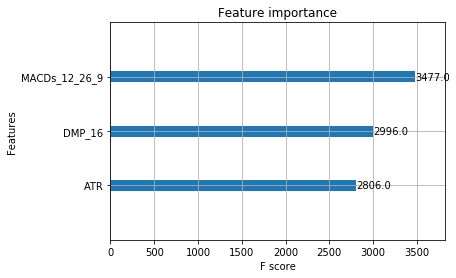

['MACDs_12_26_9', 'ATR', 'DMP_16']


In [13]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)

We get that the best performing indicators with the given hyperparamters for this run is :['MACDs_12_26_9', 'ATR', 'DMP_16']

This a template I use to pick indicator by changing hyperparamters and different prediction models as well as datasets.
